# Ejercicio: Entrenamiento y evaluación de un modelo de regresión

## Regresión
Las técnicas de aprendizaje automático supervisado consisten en entrenar un modelo para que opere sobre un conjunto de características y prediga una etiqueta utilizando un conjunto de datos que incluye algunos valores de etiquetas ya conocidos. El proceso de entrenamiento ajusta las características a las etiquetas conocidas para definir una función general que pueda aplicarse a nuevas características cuyas etiquetas se desconocen y predecirlas. Se puede pensar en esta función de la siguiente manera, en la que y representa la etiqueta que queremos predecir y x representa las características que el modelo utiliza para predecirla.

y=f(x)

En la mayoría de los casos, x es en realidad un vector que consta de múltiples valores de características, por lo que para ser un poco más precisos, la función podría expresarse así:

y=f([x1,x2,x3,...])

El objetivo del entrenamiento del modelo es encontrar una función que realice algún tipo de cálculo con los valores x que produzca el resultado y. Para ello, aplicamos un algoritmo de aprendizaje automático que intenta ajustar los valores x a un cálculo que produzca y de forma razonablemente precisa para todos los casos del conjunto de datos de entrenamiento.

Existen muchos algoritmos de aprendizaje automático para el aprendizaje supervisado, que pueden dividirse en dos tipos:

Algoritmos de regresión: Algoritmos que predicen un valor y que es un valor numérico, como el precio de una casa o el número de operaciones de venta.
Algoritmos de clasificación: Algoritmos que predicen a qué categoría, o clase, pertenece una observación. El valor y en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.
En este cuaderno, nos centraremos en la regresión, utilizando un ejemplo basado en un estudio real en el que se recogieron datos de un sistema de bicicletas compartidas y se utilizaron para predecir el número de alquileres en función de la estacionalidad y las condiciones meteorológicas. Utilizaremos una versión simplificada del conjunto de datos de ese estudio.

Cita: Los datos utilizados en este ejercicio proceden de Capital Bikeshare y se utilizan de acuerdo con el contrato de licencia publicado.



## Explorar los datos
El primer paso en cualquier proyecto de aprendizaje automático es explorar los datos que se utilizarán para entrenar un modelo. El objetivo de esta exploración es intentar comprender las relaciones entre sus atributos; en particular, cualquier correlación aparente entre las características y la etiqueta que su modelo intentará predecir. Esto puede requerir cierto trabajo para detectar y corregir problemas en los datos (como tratar valores perdidos, errores o valores atípicos), derivar nuevas columnas de características transformando o combinando características existentes (un proceso conocido como ingeniería de características), normalizar características numéricas (valores que se pueden medir o contar) para que estén en una escala similar y codificar características categóricas (valores que representan categorías discretas) como indicadores numéricos.

Empecemos cargando los datos del uso compartido de bicicletas como un DataFrame de Pandas y visualizando las primeras filas.

In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Los datos constan de las siguientes columnas

instant: Un identificador único de fila
dteday: La fecha en la que se observaron los datos; en este caso, los datos se recogieron diariamente, por lo que hay una fila por fecha.
estación: Un valor codificado numéricamente que indica la estación (1:invierno, 2:primavera, 3:verano, 4:otoño)
año: El año del estudio en el que se realizó la observación (el estudio tuvo lugar a lo largo de dos años: el año 0 representa 2011, y el año 1 representa 2012)
mnth: El mes natural en el que se realizó la observación (1:enero ... 12:diciembre)
holiday (vacaciones): Valor binario que indica si la observación se realizó o no en un día festivo)
día de la semana: El día de la semana en que se realizó la observación (0:domingo ... 6:sábado)
día laborable: Valor binario que indica si el día es laborable o no (no fin de semana ni festivo)
tiempo: Un valor categórico que indica la situación meteorológica (1:despejado, 2:niebla/nubes, 3:lluvia ligera/nieve, 4:lluvia fuerte/granizo/nieve/niebla)
temp: La temperatura en grados centígrados (normalizada)
atemp: La temperatura aparente en grados centígrados (normalizada).
hum: El nivel de humedad (normalizado)
windspeed: La velocidad del viento (normalizada)
alquileres: El número de alquileres de bicicletas registrados.
En este conjunto de datos, alquileres representa la etiqueta (el valor y) para cuya predicción debe entrenarse nuestro modelo. Las otras columnas son características potenciales (valores x).

Como se ha mencionado anteriormente, se puede realizar un poco de ingeniería de características para combinar o derivar nuevas características. Por ejemplo, añadamos una nueva columna llamada día al marco de datos extrayendo el componente día de la columna dteday existente. La nueva columna representa el día del mes del 1 al 31

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descriptivas clave. Podemos usar el método de descripción del marco de datos para generarlos para las características numéricas, así como para la columna de etiquetas de alquileres.

In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Las estadísticas revelan cierta información sobre la distribución de los datos en cada uno de los campos numéricos, incluido el número de observaciones (hay 731 registros), la media, la desviación típica, los valores mínimo y máximo y los valores de cuartil (los valores umbral para el 25%, el 50% -que también es la mediana- y el 75% de los datos). A partir de aquí, podemos ver que el número medio de alquileres diarios es de unos 848; pero hay una desviación estándar comparativamente grande, lo que indica una gran variación en el número de alquileres diarios.

Podemos hacernos una idea más clara de la distribución de los valores de los alquileres visualizando los datos. Los tipos de gráficos más comunes para visualizar distribuciones de datos numéricos son los histogramas y los gráficos de caja, así que vamos a utilizar la biblioteca matplotlib de Python para crear uno de cada uno de ellos para la columna de alquileres.

C:\Users\Jorge HN\AppData\Local\Temp\ipykernel_6652\1182655606.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


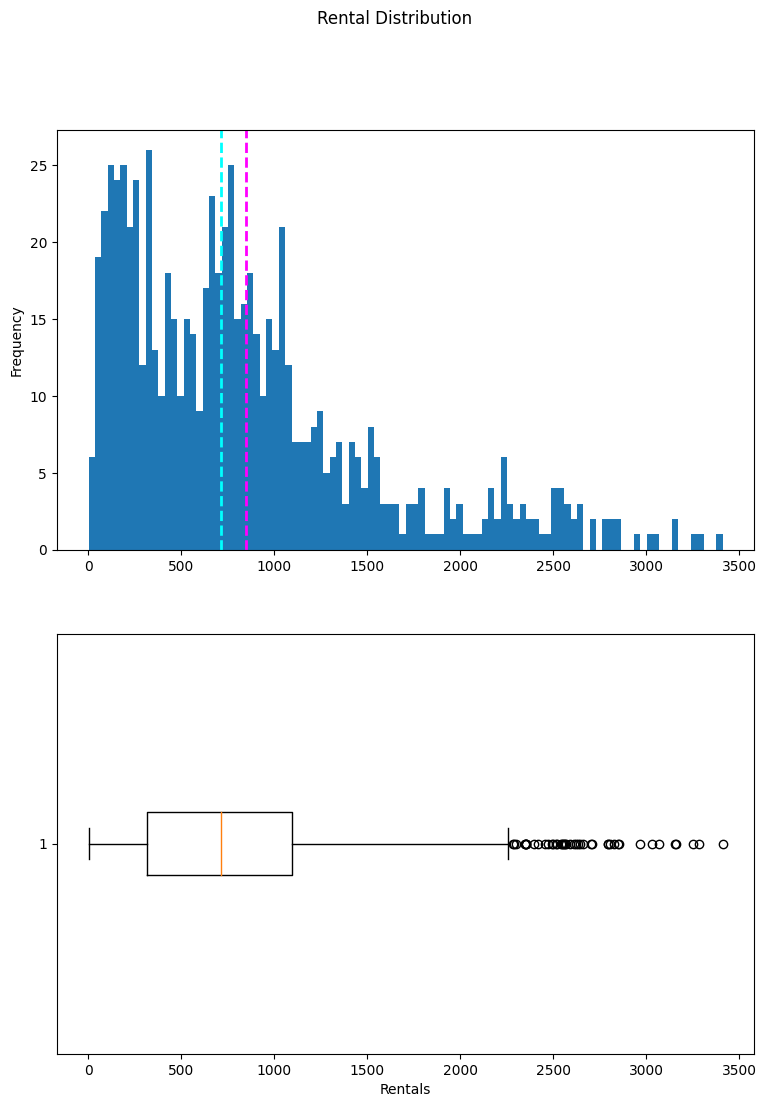

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

Los gráficos muestran que el número de alquileres diarios oscila entre 0 y algo más de 3.400. Sin embargo, la media (y la mediana) del número de alquileres diarios está más cerca del extremo inferior de ese intervalo. Sin embargo, la media (y la mediana) del número de alquileres diarios está más cerca del extremo inferior de ese rango, con la mayoría de los datos entre 0 y alrededor de 2.200 alquileres. Los pocos valores por encima de esta cifra se muestran en el diagrama de caja como pequeños círculos, lo que indica que son valores atípicos, es decir, valores inusualmente altos o bajos más allá del rango típico de la mayoría de los datos.

Podemos hacer el mismo tipo de exploración visual de las características numéricas. Creemos un histograma para cada una de ellas.

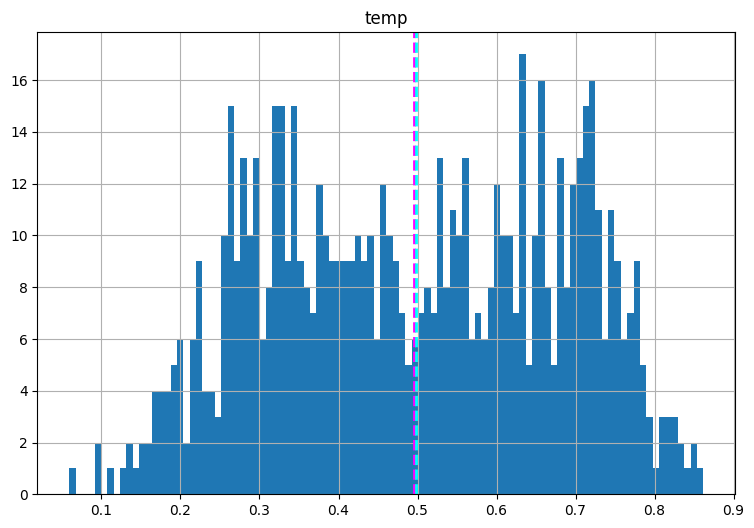

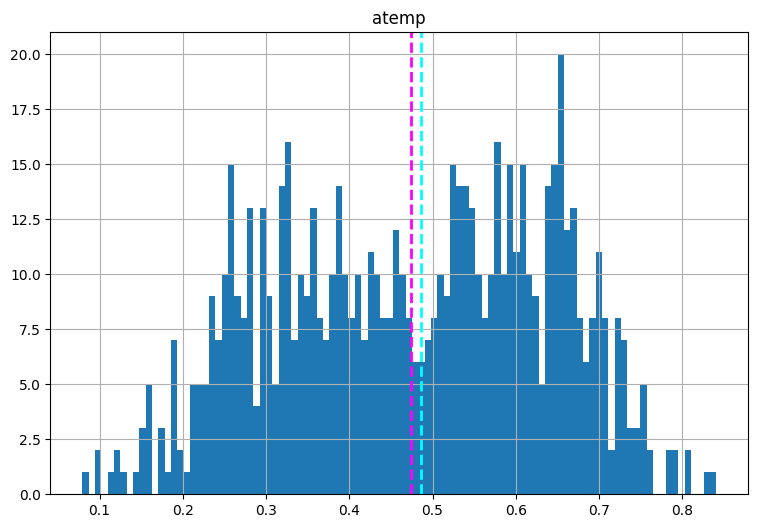

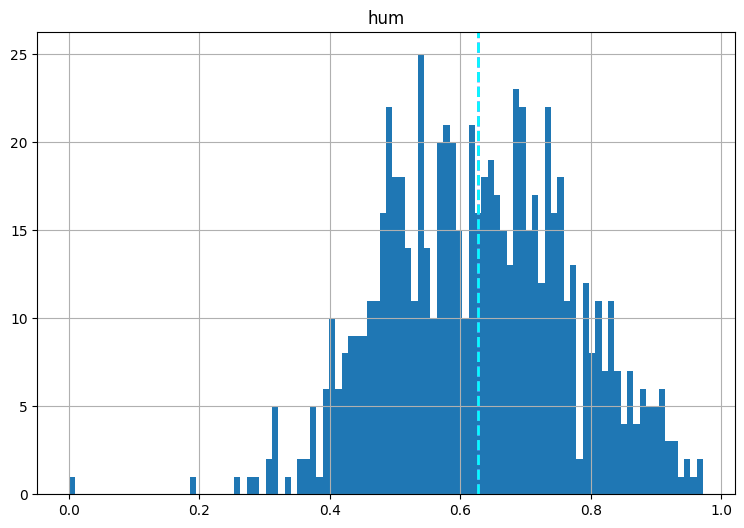

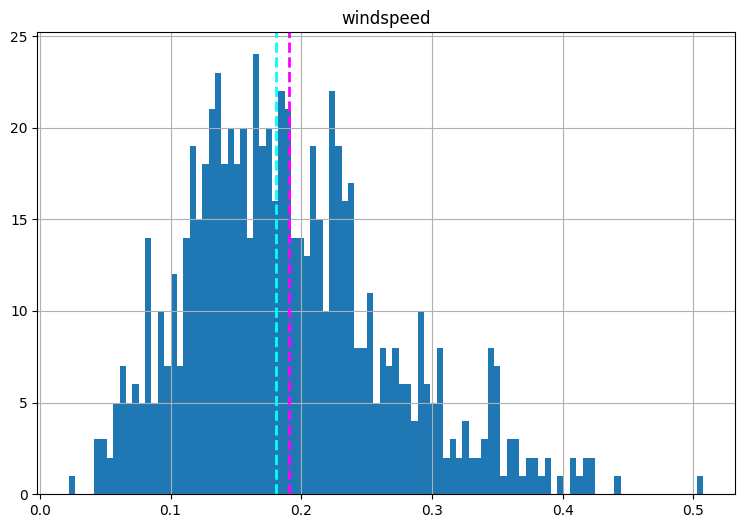

In [5]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Las características numéricas parecen tener una distribución más normal, con la media y la mediana más cerca del centro del intervalo de valores, coincidiendo con los valores más frecuentes.

Nota: Las distribuciones no son realmente normales en el sentido estadístico, lo que daría lugar a un histograma de "curva de campana" suave y simétrico con la media y la moda (el valor más común) en el centro; pero en general indican que la mayoría de las observaciones tienen un valor en algún lugar cerca del medio.

Hemos explorado la distribución de los valores numéricos en el conjunto de datos, pero ¿qué ocurre con las características categóricas? No se trata de números continuos en una escala, por lo que no podemos utilizar histogramas, pero podemos trazar un gráfico de barras que muestre el recuento de cada valor discreto para cada categoría.

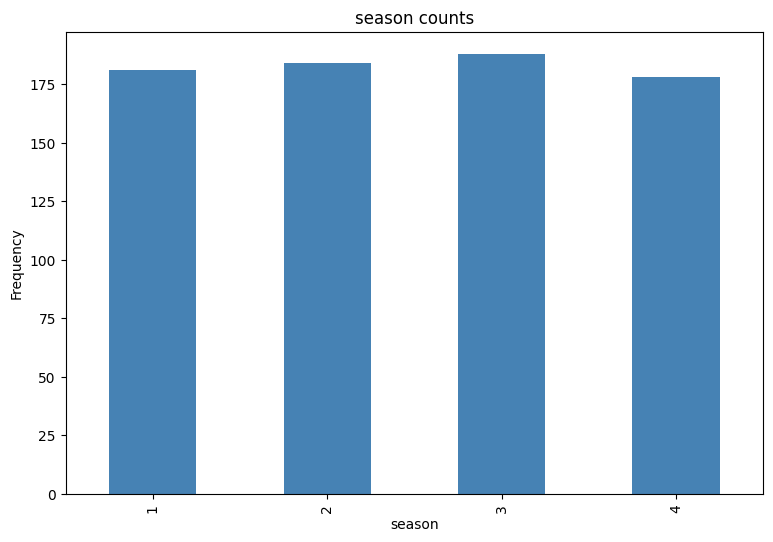

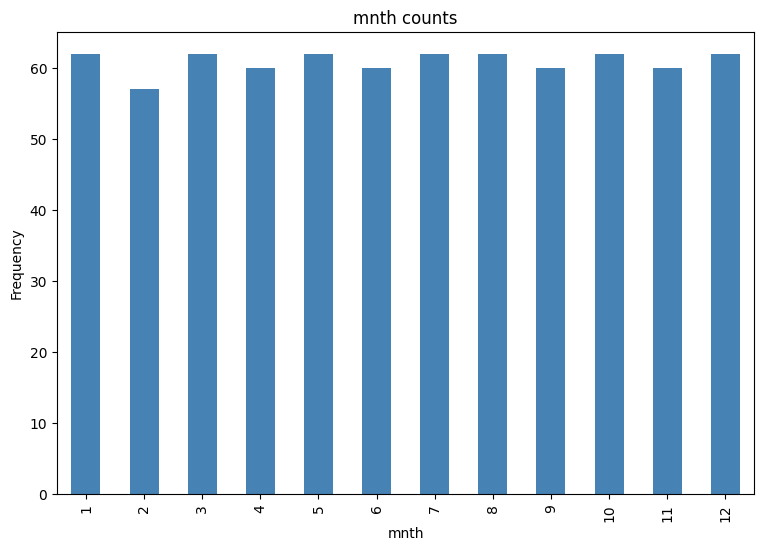

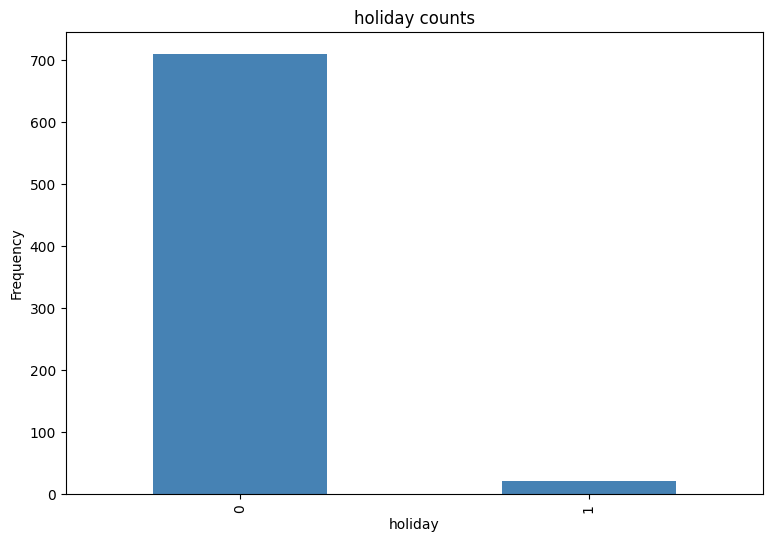

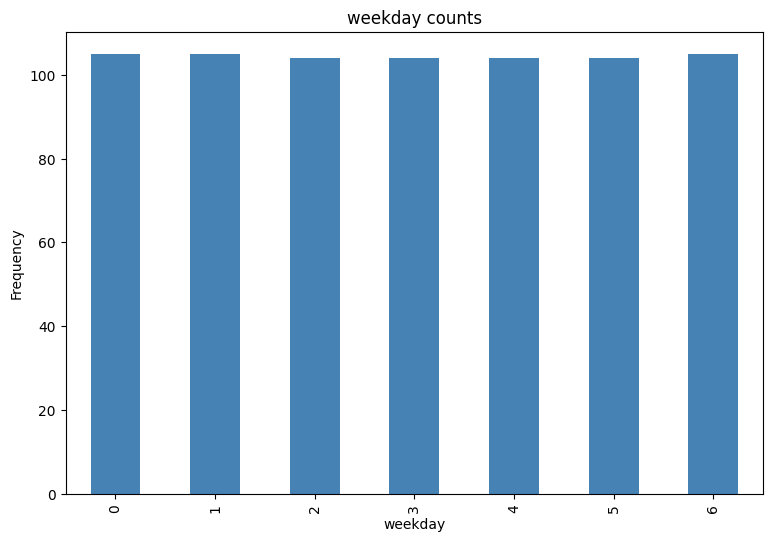

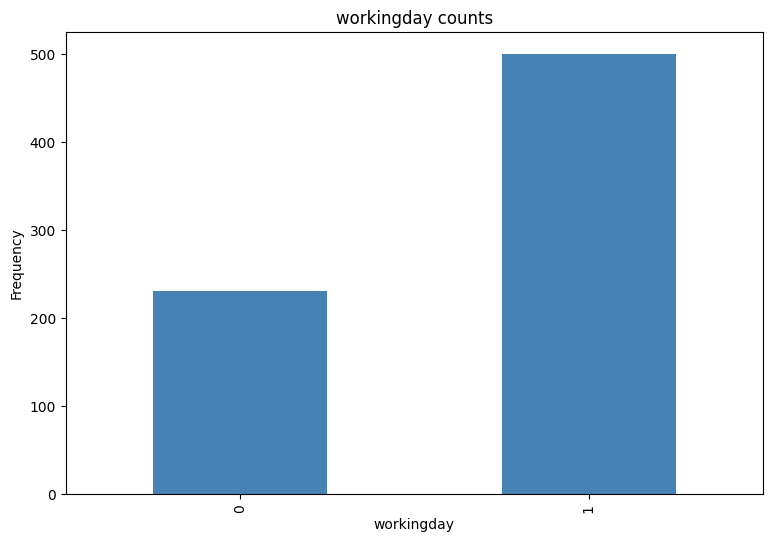

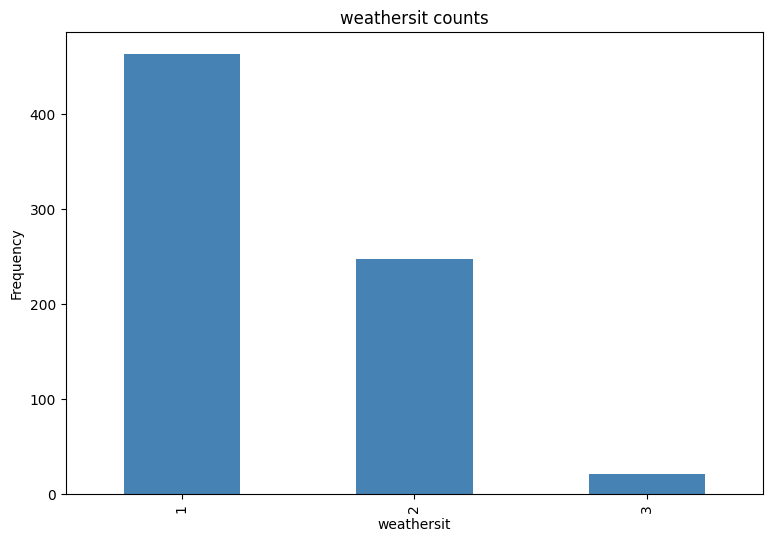

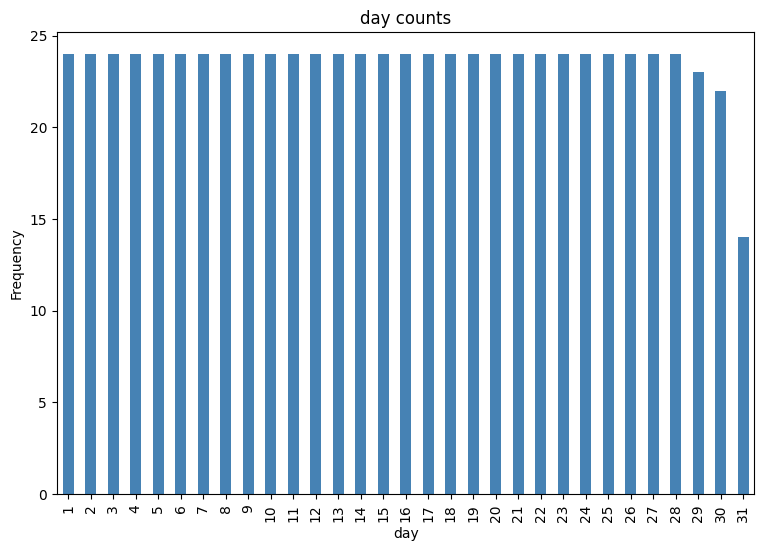

In [6]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Muchas de las características categóricas muestran una distribución más o menos uniforme (lo que significa que hay aproximadamente el mismo número de filas para cada categoría). Las excepciones son

Vacaciones: Hay muchos menos días festivos que no festivos.
laborables: Hay más días laborables que no laborables.
tiempo: La mayoría de los días son de categoría 1 (despejado), siendo la categoría 2 (niebla y nubes) la siguiente más común. Hay relativamente pocos días de categoría 3 (lluvia ligera o nieve) y ninguno de categoría 4 (lluvia intensa, granizo o niebla).
Ahora que sabemos algo sobre la distribución de los datos en nuestras columnas, podemos empezar a buscar relaciones entre las características y la etiqueta de alquiler que queremos poder predecir.

Para las características numéricas, podemos crear gráficos de dispersión que muestren la intersección de los valores de las características y las etiquetas. También podemos calcular el estadístico de correlación para cuantificar la relación aparente..

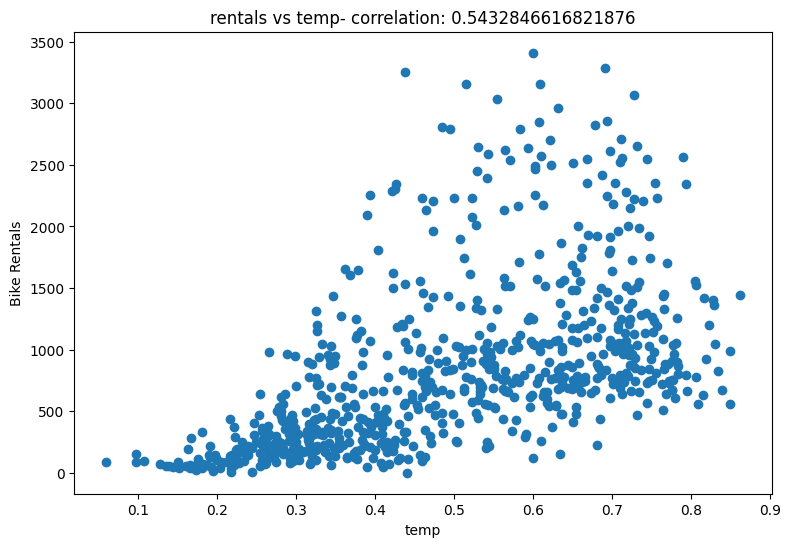

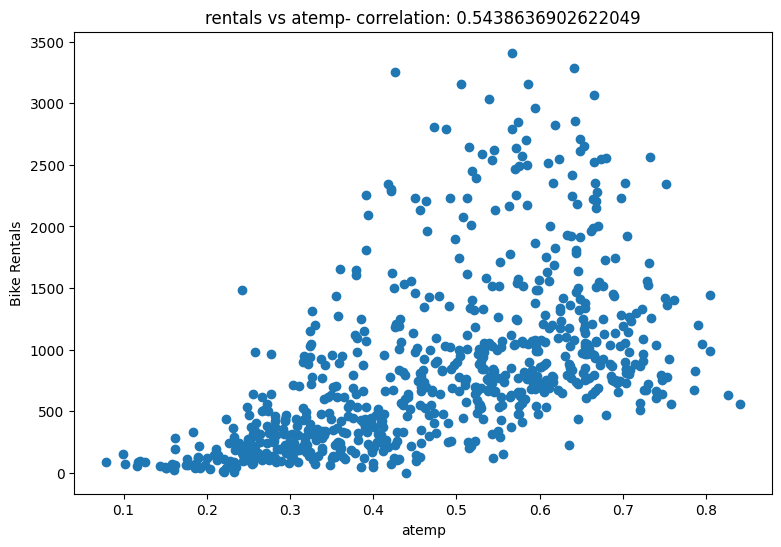

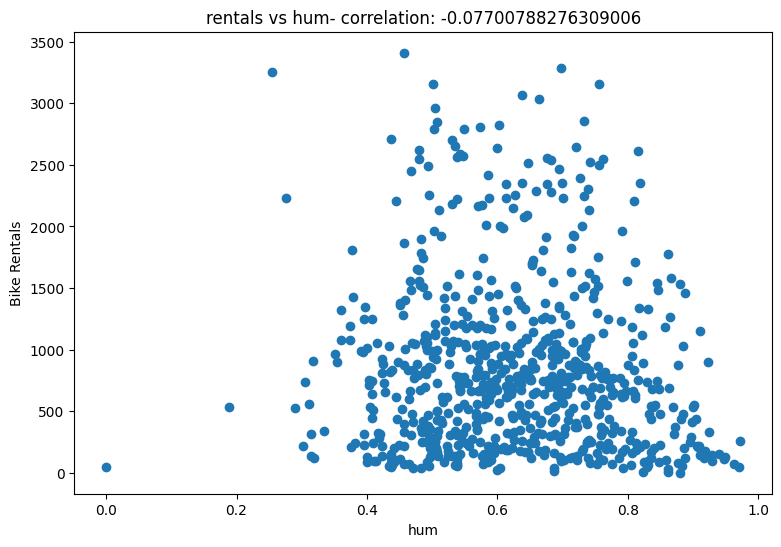

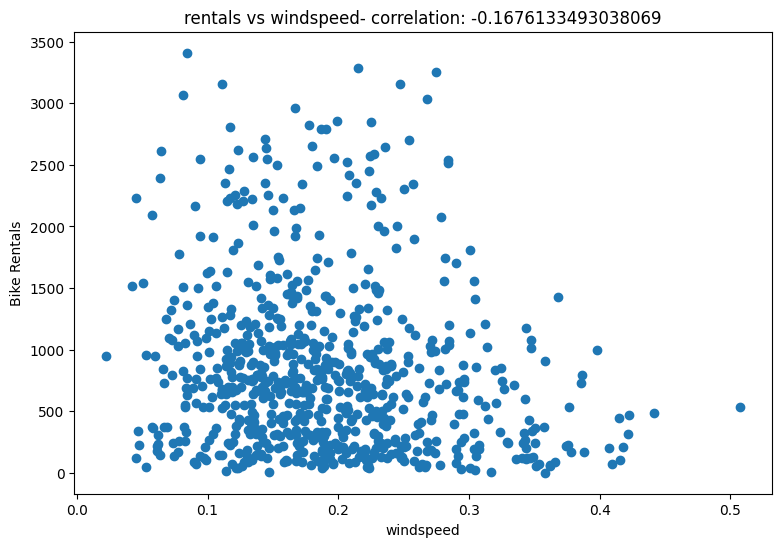

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()


Los resultados no son concluyentes, pero si se observan detenidamente los gráficos de dispersión de la temperatura y la temperatura atmosférica, se puede ver una vaga tendencia diagonal que muestra que un mayor número de alquileres tiende a coincidir con temperaturas más altas; y un valor de correlación ligeramente superior a 0,5 para ambas características apoya esta observación. Por el contrario, los gráficos correspondientes a la humedad y la velocidad del viento muestran una correlación ligeramente negativa, lo que indica que hay menos alquileres en los días en que la humedad o la velocidad del viento son elevadas.

Ahora vamos a comparar las características categóricas con la etiqueta. Para ello, crearemos gráficos de caja que muestren la distribución del número de alquileres para cada categoría.

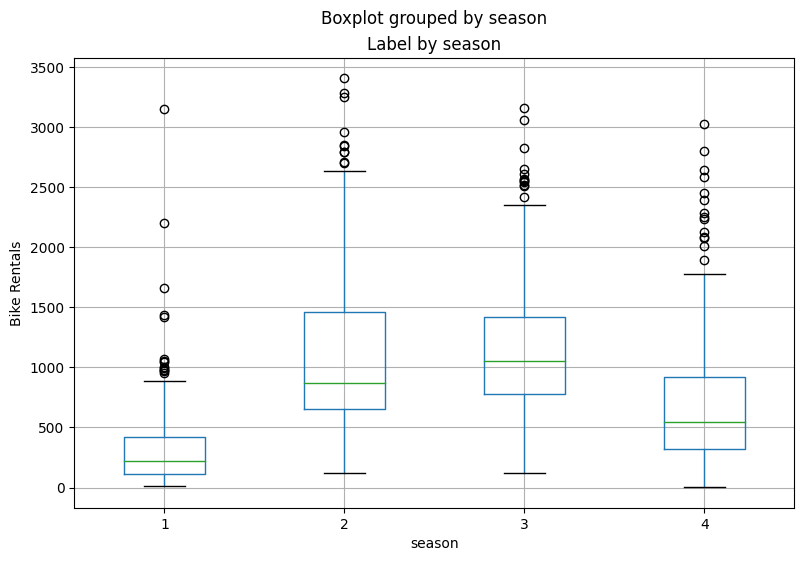

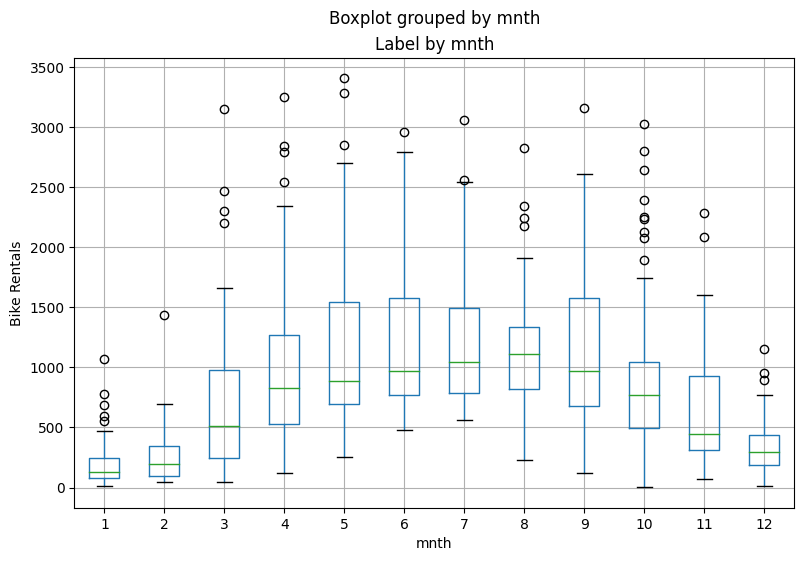

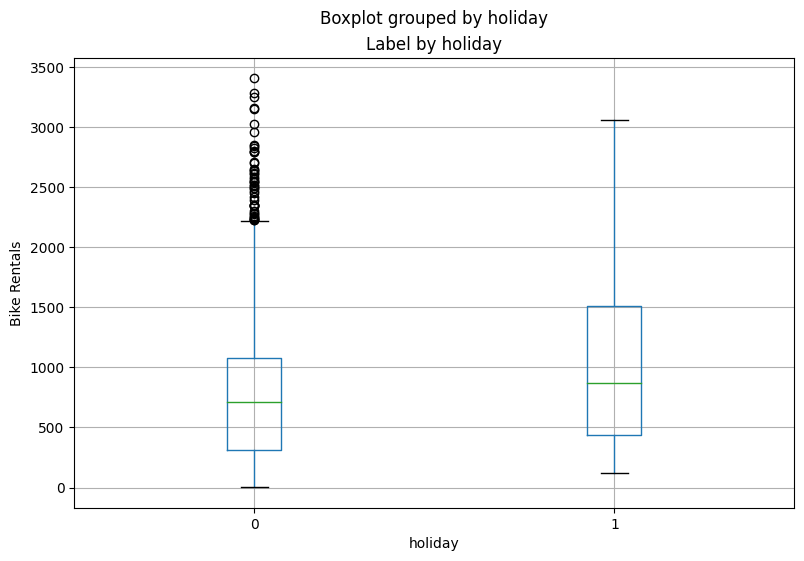

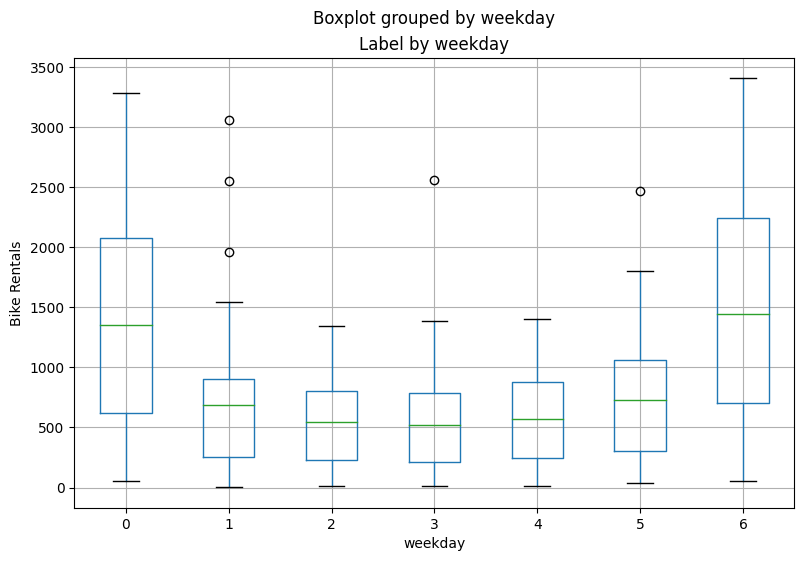

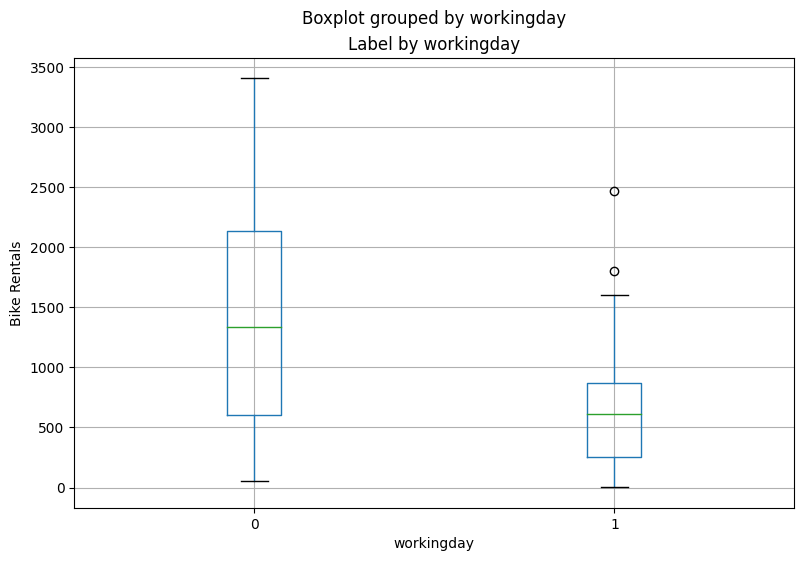

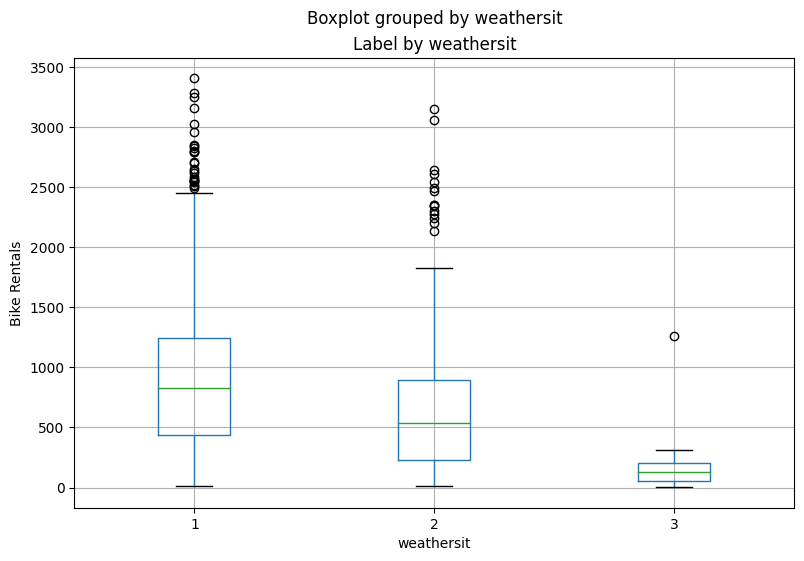

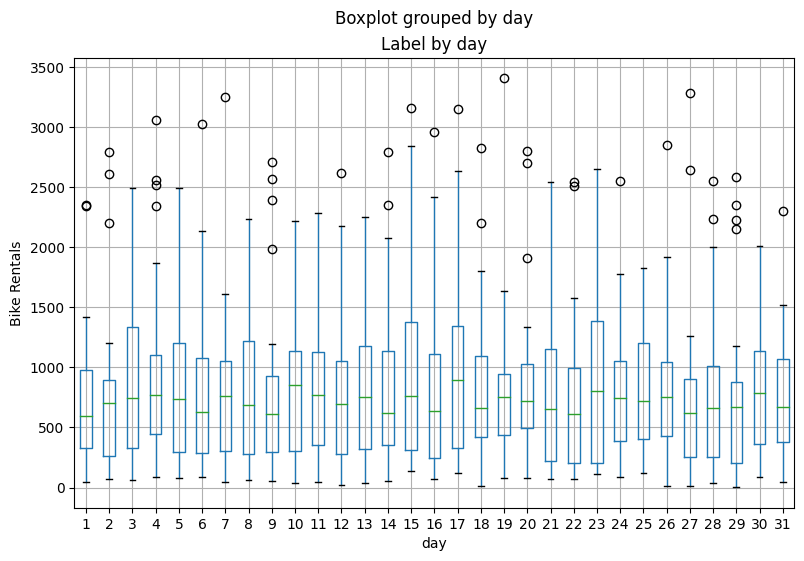

In [8]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

Los gráficos muestran cierta variación en la relación entre los valores de algunas categorías y los alquileres. Por ejemplo, hay una clara diferencia en la distribución de los alquileres en fin de semana (día de la semana 0 ó 6) y los que se producen durante la semana laboral (día de la semana 1 a 5). Del mismo modo, hay diferencias notables en las categorías de días festivos y laborables. Hay una tendencia notable que muestra diferentes distribuciones de alquileres en los meses de primavera y verano en comparación con los meses de invierno y otoño. La categoría weathersit también parece marcar una diferencia en la distribución del alquiler. La característica del día que creamos para el día del mes muestra poca variación, lo que indica que probablemente no es predictiva del número de alquileres.

## Entrenar un modelo de regresión
Ahora que hemos explorado los datos, es el momento de utilizarlos para entrenar un modelo de regresión que utilice las características que hemos identificado como potencialmente predictivas para predecir la etiqueta de alquileres. Lo primero que tenemos que hacer es separar las características que queremos utilizar para entrenar el modelo de la etiqueta que queremos que prediga.

In [9]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas X que contienen las características e y que contienen las etiquetas.

Podríamos entrenar un modelo utilizando todos los datos, pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos: un conjunto (normalmente más grande) con el que entrenar el modelo, y un conjunto más pequeño "retenido" con el que validar el modelo entrenado. Esto nos permite evaluar el rendimiento del modelo cuando se utiliza con el conjunto de datos de validación comparando las etiquetas predichas con las etiquetas conocidas. Es importante dividir los datos aleatoriamente (en lugar de, por ejemplo, tomar el primer 70% de los datos para el entrenamiento y reservar el resto para la validación). Esto ayuda a garantizar que los dos subconjuntos de datos son estadísticamente comparables (de modo que validamos el modelo con datos que tienen una distribución estadística similar a los datos con los que se entrenó).

Para dividir aleatoriamente los datos, utilizaremos la función train_test_split de la biblioteca scikit-learn. Esta biblioteca es uno de los paquetes de aprendizaje automático para Python más utilizados.

In [10]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siguientes cuatro conjuntos de datos:

X_entrenamiento: Los valores de las características que utilizaremos para entrenar el modelo
y_train: Las etiquetas correspondientes que utilizaremos para entrenar el modelo.
X_prueba: Los valores de las características que utilizaremos para validar el modelo
y_test: Las etiquetas correspondientes que utilizaremos para validar el modelo.
Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Utilizaremos un algoritmo de regresión lineal, un punto de partida común para la regresión que funciona intentando encontrar una relación lineal entre los valores X y la etiqueta y. El modelo resultante es una función que define conceptualmente una línea en la que se cruzan todas las posibles combinaciones de valores X e y.

En Scikit-Learn, los algoritmos de entrenamiento se encapsulan en estimadores, y en este caso utilizaremos el estimador LinearRegression para entrenar un modelo de regresión lineal.

In [11]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


## Evaluar el modelo entrenado
Ahora que hemos entrenado el modelo, podemos utilizarlo para predecir los recuentos de alquileres para las características que retuvimos en nuestro conjunto de datos de validación. A continuación, podemos comparar estas predicciones con los valores reales de las etiquetas para evaluar lo bien (¡o no!) que funciona el modelo.

In [12]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparar cada predicción con su correspondiente valor real no es una forma muy eficaz de determinar lo bien que predice el modelo. Veamos si podemos obtener una indicación mejor visualizando un gráfico de dispersión que compare las predicciones con las etiquetas reales. También superpondremos una línea de tendencia para tener una idea general de la concordancia entre las etiquetas predichas y las etiquetas reales.

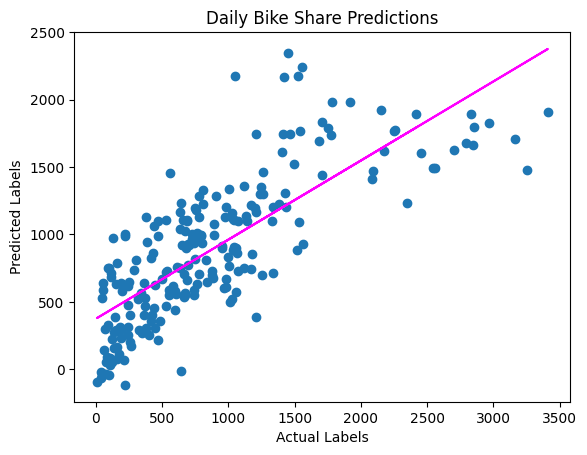

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hay una tendencia diagonal definida, y las intersecciones de los valores predichos y reales siguen en general la trayectoria de la línea de tendencia; pero hay bastante diferencia entre la función ideal representada por la línea y los resultados. Esta diferencia representa los residuos del modelo, es decir, la diferencia entre la etiqueta prevista cuando el modelo aplica a los datos de validación los coeficientes aprendidos durante el entrenamiento y el valor real de la etiqueta de validación. Estos residuos, evaluados a partir de los datos de validación, indican el nivel de error esperado cuando el modelo se utiliza con nuevos datos cuya etiqueta se desconoce.

Puede cuantificar los residuos calculando una serie de métricas de evaluación de uso común. Nos centraremos en las tres siguientes:

Error cuadrático medio (ECM): La media de las diferencias al cuadrado entre los valores predichos y los reales. Se trata de una métrica relativa en la que cuanto menor es el valor, mejor es el ajuste del modelo.
Error cuadrático medio (RMSE): La raíz cuadrada del MSE. Proporciona una medida absoluta en la misma unidad que la etiqueta (en este caso, el número de alquileres). Cuanto menor sea el valor, mejor será el modelo (en un sentido simplista, representa el número medio de alquileres en el que las predicciones son erróneas).
Coeficiente de determinación (normalmente conocido como R-cuadrado o R2): Una métrica relativa en la que cuanto mayor es el valor, mejor es el ajuste del modelo. En esencia, esta métrica representa la parte de la varianza entre los valores predichos y reales de la etiqueta que el modelo es capaz de explicar.
Nota: Puede encontrar más información sobre estas y otras métricas para evaluar modelos de regresión en la documentación de Scikit-Learn.
Utilicemos Scikit-Learn para calcular estas métricas para nuestro modelo, basándonos en las predicciones que generó para los datos de validación.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035598
RMSE: 449.41357285951653
R2: 0.604045473691919


Ya hemos cuantificado la capacidad de nuestro modelo para predecir el número de alquileres. Definitivamente tiene cierto poder predictivo, ¡pero probablemente podemos hacerlo mejor!

Resumen
Hemos explorado nuestros datos y ajustado un modelo de regresión básico. En el próximo cuaderno, probaremos otros algoritmos de regresión para mejorar el rendimiento.

Lecturas adicionales
Para obtener más información sobre Scikit-Learn, consulte la documentación de Scikit-Learn